In [212]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2

from skimage import io, color
from skimage import filters
from scipy import ndimage

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import regionprops, label

import cv2
import matplotlib.pyplot as plt
import numpy as np

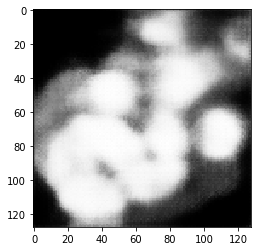

In [214]:
img=cv2.imread("./results/t000.tif", 0)
# element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# img = cv2.erode(img, element)
plt.imshow(img, cmap="gray")
# img.shape

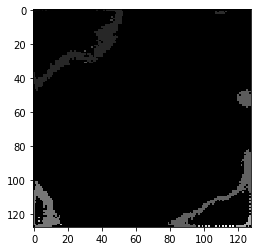

In [217]:
bin_threshold = 10
background_threshold = 3
foreground_threshold = 100
number_of_test_images=1
for i in range(0, number_of_test_images):
    imresult = img
    ret, thresh = cv2.threshold(255 - imresult*255, bin_threshold, 255,cv2.THRESH_BINARY_INV) # transform the unet result to binary image
    thresh=thresh/255 # normalize to 1
    
    edges = ndimage.sobel(thresh) # filter with sobel
    markers = np.zeros_like(thresh)
    foreground, background = 1, 2
    
    # set background and foreground with low and high threshold
    markers[thresh < background_threshold / 255] = background
    markers[thresh > foreground_threshold / 255] = foreground
    
    ws = watershed(edges, markers)
    seg = ndimage.label(ws == foreground)[0]
    plt.imshow(seg, cmap="gray")
#     # get centroids and areas
#     regions = regionprops(seg)
#     regions = [r for r in regions if r.area > 10]
#     print('Number of centroids for image '+str(i) + ': ', len(regions))
#     centroids = [r.centroid for r in regions if r.area > 10]
#     x = [i[0] for i in centroids]
#     y = [i[1] for i in centroids]
    
#     #plot centroid on original image
#     image = cv2.imread("results/t000.tif")
#     im_shape = image.shape
#     x_scale =  [x_single*im_shape[0]/256 for x_single in x]
#     y_scale =  [y_single*im_shape[1]/256 for y_single in y]
#     image_square = cv2.resize(image, (128,128))
#     image_square[markers==0] = (255, 0 , 0)
#     image_square = cv2.resize(image_square,im_shape[0:2])
    
    
#     plt.figure()
#     plt.imshow(image, cmap='gray')
#     plt.scatter(y_scale,x_scale, c = 'r',marker = 'o')
#     plt.title("Number " + str(i))
# #     plt.savefig(os.path.join("data/test/result", str(i) + "_dots.png"))


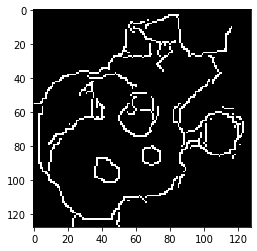

In [190]:
gray = cv2.bilateralFilter(img, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged, cmap="gray")

In [191]:
# # ret,thresh = cv2.threshold(edged,127,255,0)
# # plt.imshow(thresh)
# _, contours, _=cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# test=img.copy()
# test=cv2.drawContours(test, contours, -1, (255,255,0), 3)
# plt.imshow(test, cmap="gray")

In [192]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2
def perform_watershed(image):
    distance = ndi.distance_transform_edt(image)
    peak = peak_local_max(distance,indices=False, labels=image)
    markers = ndi.label(peak)[0]
    ws_labels = watershed(-distance, markers, mask=image)
    return ws_labels

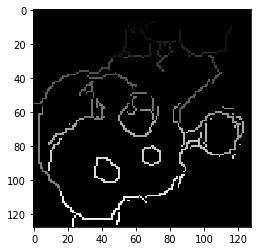

In [193]:
ws_img=perform_watershed(edged)
plt.imshow(ws_img, cmap="gray")

0.0
2.0
14022.5
0.0


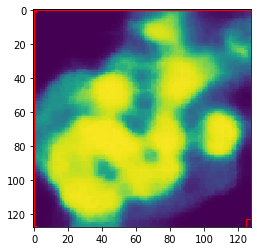

In [132]:
import matplotlib.patches as patches
_, contours, _=cv2.findContours(test, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
fig,ax = plt.subplots(1)
ax.imshow(img)
for c in contours:
    rect = cv2.boundingRect(c)
    print(cv2.contourArea(c))
    x,y,w,h = rect
#     cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
    rect = patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

In [62]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2
def perform_watershed(image, img):
    distance = ndi.distance_transform_edt(image)
    peak = peak_local_max(distance,indices=False, labels=img)
    markers = ndi.label(peak)[0]
    ws_labels = watershed(-distance, markers, mask=image)
    return ws_labels

In [63]:
ws_img=perform_watershed(canny, img)

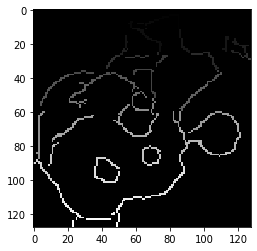

In [64]:
plt.imshow(ws_img, cmap="gray")

In [33]:
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

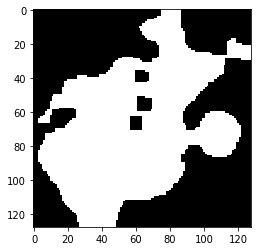

In [34]:
# plt.imshow(th2, cmap="gray")

In [35]:
# ws_img=perform_watershed(th2)

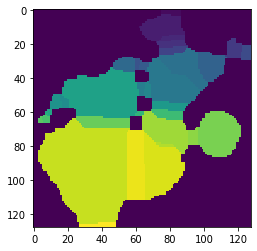

In [36]:
# plt.imshow(ws_img)